## Question

What is the interpretation of Laplace smoothing in n-gram language model?

Если слова из вокабуляра не встречаются вместе в трейне, это еще не значит что вероятность встретить их вместе равна 0. Они могут встретиться вместе в тесте, и чтобы модель не приписывала этому вероятность 0, применяют smoothing.
Laplace smoothing (или add-one) добавляет к счету каждой n-gram 1 до перевода чисел в вероятности. Кроме этого, мы должны увеличить количество observations. Таким образом, мы «отдадим» часть вероятности от тех n-gramm, что встречаются, тем, что не встречаются. 

# Exam

Develop a model for predicting review rating.  
**Binary classification:**  
**positive class: target = 5**   
**negative class: target = 1,2,3,4**  
Score: **binary F1**  
You are forbidden to use test dataset for any kind of training.  
Remember proper training pipeline.  
If you are not using default params in the models, you have to use some validation scheme to justify them. 

Use `random_state` or `seed` params - your experiment must be reprodusible.


### 1 baseline = 0.720
### 2 baseline = 0.745


In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import ClassifierMixin
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

random_state = 42

In [0]:
def train_valid_pipeline(model, X_train, y_train, X_test, y_test, params):
#  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
  model.fit(X_train, y_train)
  print("f1_score on train: ", f1_score(y_train, model.predict(X_train)))

  valid = GridSearchCV(model, param_grid = params, cv = 3)
  valid.fit(X_train, y_train)
  print("f1_score after regularization: ", f1_score(y_train, valid.predict(X_train)))
  print("Best params: ", valid.best_params_)
  model = valid.best_estimator_

  print("f1_score on test: ", f1_score(y_test, model.predict(X_test)))

In [4]:
df_train = pd.read_csv('train.csv')
df_train.head()

,review,title,target
0,"The staff was very friendly, the breakfast ver...",Walker Gem,5
1,Excellent service - very approachable and prof...,Excellent Service,4
2,Really a top notch place to spend a day at the...,"Good location, warm and friendly staff",5
3,"a little noisy, there was a false fire alarm a...","nice hotel,",4
4,Place had too many animals and I'm allergic to...,Experience,3


In [5]:
df_test = pd.read_csv('test.csv')

df_train['target'] = (df_train['target'] == 5).astype(np.int)
df_test['target'] = (df_test['target'] == 5).astype(np.int)

df_train.head()

,review,title,target
0,"The staff was very friendly, the breakfast ver...",Walker Gem,1
1,Excellent service - very approachable and prof...,Excellent Service,0
2,Really a top notch place to spend a day at the...,"Good location, warm and friendly staff",1
3,"a little noisy, there was a false fire alarm a...","nice hotel,",0
4,Place had too many animals and I'm allergic to...,Experience,0


In [0]:
X_train = df_train['review']
y_train = df_train['target']

tfidf = TfidfVectorizer(max_df=0.5, min_df=10)
X_train = tfidf.fit_transform(X_train)

X_test = tfidf.transform(df_test['review'])
y_test = df_test['target']

In [0]:
paramsKNN = {'n_neighbors': range(1, 10), 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [0]:
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
f1_score(y_train, model.predict(X_train))

0.7519898792894418

In [20]:
f1_score(y_test, model.predict(X_test))

0.7088788383718162

In [46]:
train_valid_pipeline(KNeighborsClassifier(), X_train, y_train, X_test, y_test, paramsKNN)

f1_score on train:  0.6077637804252408


KeyboardInterrupt: ignored

In [0]:
params_logreg = {'cv': [3], 'dual' : [True, False], 'solver' : ['liblinear'], 'random_state': [random_state]}

In [24]:
train_valid_pipeline(LogisticRegressionCV(), X_train, y_train, X_test, y_test, params_logreg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


f1_score on train:  0.73294378185117


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

KeyboardInterrupt: ignored

f1 0.5803288145370638
auc 0.8283752400395343


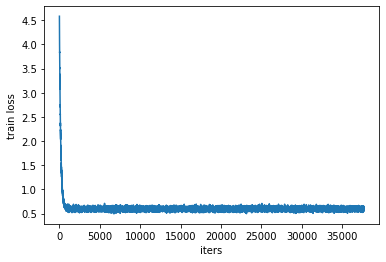

In [10]:
class LogRegNumpy(ClassifierMixin):
    def __init__(self, llambda=1, lr=0.1, batch_size=32, n_epochs=100):
        """
        llambda: regularization strength
        lr: learning rate
        """
        self.w = None
        self.b = 0
        self.llambda = llambda
        self.n_epochs = n_epochs
        self.lr = lr
        self.history = []
        self.batch_size = batch_size
        
    def fit(self, X, y):
        self.w = np.random.randn(X.shape[1])
        self.b = 0
        
        for epoch in range(self.n_epochs):
            
            # random permutation over indices of dataset
            batch_indices = np.random.permutation(len(y))
            
            for j in range(0, len(y), self.batch_size):
                batch_idx = batch_indices[j:j+self.batch_size]
                batch_X = X[batch_idx]
                batch_y = y[batch_idx]
            
                # forward pass
                # <TODO> [1 point] calculate batch loss
                sigm = self.predict_proba(batch_X) 
                loss = -np.mean(batch_y * np.log(sigm) + (1 - batch_y) * np.log(1 - sigm)) + (self.llambda / 2) * self.w.T.dot(self.w)

                # backward pass
                # <TODO> [2 points] calculate batch gradients 

                grad = sigm - batch_y
                grad_w = batch_X.T.dot(grad)* (1.0/self.batch_size) + self.llambda * self.w
                grad_b = np.mean(grad)

                # SGD optimization step
                # <TODO> [1 point]
                self.w = self.w - self.lr * grad_w
                self.b = self.b - self.lr * grad_b
                
                self.history.append(loss)
        
        return self 
    
    def predict_proba(self, X):
        # <TODO> [1 point] calculate p(y=1 | x)
        p = 1.0 / (1+ np.exp(-1 * (X.dot(self.w.T) + self.b)))
        #print(p)
        return p
    
    def predict(self, X):
        return (self.predict_proba(X) > 0.5).astype(np.int)
    
    
model = LogRegNumpy()
model.fit(X_train, y_train)
print('f1', f1_score(y_test, model.predict(X_test)))
print('auc', metrics.roc_auc_score(y_test, model.predict_proba(X_test)))

plt.plot(np.arange(len(model.history)), model.history)
plt.xlabel('iters')
plt.ylabel('train loss');

In [0]:
llambda = 0.001, lr=3, batch_size=128, n_epochs=100